<a href="https://colab.research.google.com/github/SakumaRyoDev/study_ml/blob/main/nlp100_sec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mecab-python3 ipadic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from urllib.request import urlopen

with urlopen("https://nlp100.github.io/data/neko.txt") as f:
    text = f.read().decode('utf-8')

In [3]:
import MeCab
import ipadic
from typing import Iterator, NamedTuple


class Word(NamedTuple):
    surface: str
    base: str
    pos: str
    pos1: str


def yield_word() -> Iterator[Word]:
    tagger = MeCab.Tagger(ipadic.MECAB_ARGS)
    node = tagger.parseToNode(text)

    filler = "*"
    words = []

    node = node.next  # skip BOS
    while node.next:  # skip EOS
        feats = node.feature.split(",")

        base = feats[6]
        if base == filler:
            base = ""

        pos1 = feats[1]
        if pos1 == filler:
            pos1 = ""

        yield Word(
            node.surface,
            base,
            feats[0],
            pos1,
        )

        node = node.next

In [4]:
{w.surface for w in yield_word() if w.pos == "動詞"}

{'負え',
 '可愛がら',
 '抑える',
 '仕入れ',
 '割り込む',
 '図ら',
 '響く',
 '見よ',
 '講じ',
 '綻びる',
 '担ぐ',
 '飛ん',
 '覗い',
 '垂れる',
 'おこせ',
 '釣っ',
 'こぼれ',
 '交ぜ返す',
 'つかん',
 '飛び',
 '働い',
 '擦り切れ',
 '吹き',
 'わかっ',
 '抓ま',
 '依る',
 '握ろ',
 '明か',
 '忘れろ',
 'ふれ',
 '飛込め',
 '懸ら',
 '住め',
 '連れ',
 '換える',
 '引き寄せる',
 'のしかかっ',
 'あぶら',
 '照り付け',
 '嫌っ',
 'うく',
 '極まっ',
 'おい',
 '交ぜ',
 '届い',
 '置い',
 '流れれ',
 'み',
 '思い出す',
 'ぬい',
 'ころばし',
 '起き直っ',
 '好ん',
 'てりゃ',
 '張っ',
 '去る',
 '寝転ん',
 'うたっ',
 '得る',
 '穿く',
 '呼び立て',
 '教わっ',
 'かくし',
 'なん',
 '吸取り',
 '已めろ',
 '疲らし',
 'できる',
 '添う',
 '当る',
 '着',
 '焦る',
 '覆せ',
 '視る',
 'なりすまし',
 '彫っ',
 'ときゃ',
 '積み',
 '喰っ',
 '捻っ',
 '促し',
 '刻ん',
 '飼い',
 '利き',
 '画い',
 '推す',
 'しかけ',
 '押しかけ',
 '洗っ',
 '吐き出す',
 '見舞う',
 '来よ',
 '売る',
 '入り乱れ',
 '光る',
 'たれる',
 '為す',
 'のべる',
 '布か',
 '上ら',
 '見棄て',
 '逆らっ',
 '散らし',
 '巻く',
 '構い',
 '裏返し',
 '聞き惚れ',
 '洩',
 '推し',
 '馴れ',
 '叩きつける',
 '取り上げる',
 'きつけ',
 '羨む',
 'ころがり',
 '凌ぐ',
 '読む',
 '呑ん',
 '捩じ',
 '魂消る',
 'なれる',
 '持つ',
 'よら',
 '廃せ',
 'ぬけ',
 '打ち解け',
 'かえる',
 '好か',
 '給え',
 'ゆく',
 '跳ね返し',
 '抜

In [5]:
{w.base for w in yield_word() if w.pos == "動詞"}

{'打ち返す',
 'とおる',
 '掬う',
 '抑える',
 '剥ぐ',
 '割り込む',
 '響く',
 '綻びる',
 '見受ける',
 '担ぐ',
 '垂れる',
 '通り掛る',
 '交ぜ返す',
 '引っ繰り返す',
 '依る',
 '換える',
 '濁る',
 '引き寄せる',
 'うく',
 '思い出す',
 '加わる',
 'いいかえる',
 '去る',
 '得る',
 '穿く',
 '溶かす',
 '借る',
 '押し付ける',
 'できる',
 '添う',
 '当る',
 '焦る',
 'つかまる',
 '視る',
 'つかみ合う',
 '遇う',
 '推す',
 '寝そべる',
 '洒落れる',
 '吐き出す',
 '見舞う',
 'のべる',
 '売る',
 '光る',
 'たれる',
 '為す',
 '片づく',
 '寝かす',
 '巻く',
 '仰せつける',
 'ちょろまかす',
 '留る',
 'やらす',
 '叩きつける',
 '取り上げる',
 '凌ぐ',
 '放り出す',
 '羨む',
 '読む',
 'かえる',
 '魂消る',
 'なれる',
 '持つ',
 '撃つ',
 '吸取る',
 '断つ',
 'ゆく',
 '跨ぐ',
 '抜く',
 '聞こえる',
 '蒙る',
 '曲がる',
 'あきらめる',
 '悩ます',
 '吹き付ける',
 '押し出す',
 '殖える',
 'かきつける',
 '背く',
 'フケる',
 '称する',
 'しめつける',
 '捕れる',
 '生ずる',
 'かむ',
 '察する',
 '刈り込む',
 '出合う',
 'ぶらつく',
 '造る',
 '疑る',
 'はりつける',
 'くむ',
 '苦しめる',
 '見捨てる',
 '載せる',
 '慣れる',
 '取り立てる',
 '填める',
 '吸い出す',
 '繋ぐ',
 '小突く',
 '炊く',
 '漂う',
 '詫びる',
 '刺し通す',
 '疲らす',
 '曝す',
 '有する',
 '湧き出る',
 '歴る',
 '苦しむ',
 'あつかう',
 '祟る',
 'せる',
 'あげる',
 '押しやる',
 '厭きる',
 '仰ぐ',
 '輝く',
 '揺れる',
 'みる',
 '眺める',
 '縊れる',
 

In [6]:
tagger = MeCab.Tagger(ipadic.MECAB_ARGS)


def _is_noun(s: str) -> bool:
    return tagger.parse(s).split("\t")[1].startswith("名詞,")


def _is_compound(w: Word) -> bool:
    if w.pos != "名詞":
        return False

    tokens = [s for s in w.surface.split("の") if len(s) > 0]
    if len(tokens) < 2:
        return False

    return all((_is_noun(t) for t in tokens))


{w.surface for w in yield_word() if _is_compound(w)}

{'この世',
 'この間',
 'その他',
 'その後',
 'その間',
 '世の中',
 '中の間',
 '亀の甲',
 '二の腕',
 '北の方',
 '天の橋立',
 '天の河',
 '女の子',
 '宵の口',
 '山の上',
 '山の芋',
 '岩の上',
 '年の功',
 '床の間',
 '思いのほか',
 '日の出',
 '木の根',
 '木の葉',
 '松の木',
 '板の間',
 '梁上の君子',
 '次の間',
 '気の毒',
 '水の上',
 '火の手',
 '火の車',
 '男の子',
 '腋の下',
 '腹の中',
 '茶の間',
 '蜂の巣',
 '血の道',
 '袖の下',
 '身の丈',
 '身の上',
 '身の毛',
 '香の物',
 '馬の骨',
 '鬨の声'}

In [7]:
import re
from collections import Counter


words = [w for w in yield_word()]


seq = "".join(["T" if w.pos == "名詞" else "F" for w in words])

{
    "".join([w.surface for w in words[m.start():m.end()]])
    for m in re.compile("TT+").finditer(seq)
}

{'半分降参',
 '曝くに',
 'ハハハそれ',
 '三分一',
 '先生番茶',
 '灰吹きが',
 '張り具合',
 '是非共眼',
 '一粒',
 '雑物',
 '迷亭君例',
 '仕舞物',
 '百二十',
 '舞踏会',
 '俳人高浜虚子',
 'その後野良',
 '文盲漢',
 '水盃',
 '寒月君首縊り',
 'こっちの',
 '○子',
 '住家',
 '文切り形',
 '怒り方',
 '象徴詩',
 '霊活',
 '時大',
 '元来ここ',
 '模範勝手',
 '浅田宗伯',
 '軍百万人',
 '三十度',
 'ゅ愚',
 '嬢さん',
 '束髪姿',
 '四日目',
 '騒動中',
 '毎日毎日御苦労',
 '上等品',
 '鈴木君',
 '浴場全体',
 '消極主義',
 '燕ぴ',
 '候饗宴',
 'ぐる男',
 '結了',
 '監督組',
 '令嬢阿倍川',
 '御座候本書',
 '穏かな日',
 '廿年',
 '演説会',
 '彼等顔面',
 '旧式運動',
 '植込',
 '三方面共',
 '肌寒',
 '当該事件',
 '虎闘',
 '得たる',
 '貴様等',
 '物指',
 '日暮れ方',
 '人間世界',
 '臨済録',
 '山高帽',
 'の功徳',
 'さの',
 '羅馬人',
 '韋駄天',
 '金釦',
 '吾輩自身',
 '五六人',
 '二世',
 '女客',
 '上不思議',
 '時黒雲共隣国',
 '間違',
 '先祖代々',
 '鴨南蛮',
 '昔人',
 '経験譚',
 'たまえ月十円',
 '土用中',
 '一時間前',
 'せんだってミュッセ',
 '不断着',
 '情線',
 '十年近く',
 '吾一箇',
 '早晩日本',
 '張り番',
 '拵ら',
 'そこかしこ',
 '沙弥君',
 '自分さい',
 '鼻名',
 '俗了',
 '当時巡査',
 'ちの中',
 '一杯',
 'あなた外套',
 '双方共四間',
 '何百遍',
 '多感多恨',
 '日雇婆',
 'なあに大丈夫',
 '咽喉笛',
 '鼻子鼻子',
 '暗黒色',
 '古代希臘',
 '南蛮鉄',
 '手伝',
 'こないだ東京詰',
 '一今時泉岳寺',
 '吾輩これ',
 'あと大',
 'ちゃん付き',
 '

In [8]:
from collections import Counter


counter = Counter([w.surface for w in words if w.pos not in ["記号", "助詞"]])
counter.most_common()

[('た', 3990),
 ('ない', 2391),
 ('だ', 2367),
 ('し', 2286),
 ('ある', 1730),
 ('で', 1728),
 ('の', 1609),
 ('ん', 1554),
 ('な', 1297),
 ('いる', 1249),
 ('事', 1207),
 ('する', 1002),
 ('う', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('この', 649),
 ('御', 635),
 ('人', 602),
 ('その', 577),
 ('一', 555),
 ('そう', 549),
 ('何', 543),
 ('なる', 531),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 480),
 ('ます', 458),
 ('これ', 414),
 ('なっ', 404),
 ('それ', 399),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('時', 346),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('ところ', 315),
 ('三', 314),
 ('方', 312),
 ('二', 302),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒月', 286),
 ('顔', 282),
 ('ぬ', 277),
 ('先生', 274),
 ('見る', 273),
 ('人間', 272),
 ('だろ', 270),
 ('僕', 268),
 ('たら', 264),
 ('さん', 260),
 ('なく', 258),
 ('気', 250),
 ('あり', 249),
 ('猫', 248),
 ('出', 245),
 ('出来', 244),
 ('云っ', 241),
 ('また', 238),
 ('中', 233),
 ('思っ', 232),
 ('十', 230),
 ('ごとく', 225),
 ('あっ', 221),
 ('どう', 220),
 ('細君', 21

,words,counts
0,た,3990
1,ない,2391
2,だ,2367
3,し,2286
4,ある,1730
5,で,1728
6,の,1609
7,ん,1554
8,な,1297
9,いる,1249


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12354 missing from current font.
  font.set_

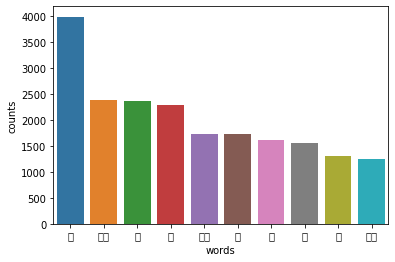

In [12]:
import seaborn as sns
import pandas as pd


popular = counter.most_common()[0:10]
x = [w[0] for w in popular]
y = [w[1] for w in popular]

df = pd.DataFrame({
    "words": x,
    "counts": y,
})

sns.barplot(x="words", y="counts", data=df)
df

,word,counts
0,で,19
1,だ,19
2,吾輩,13
3,ない,10
4,た,8
5,いる,8
6,ある,8
7,この,8
8,いえ,8
9,等,7


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_

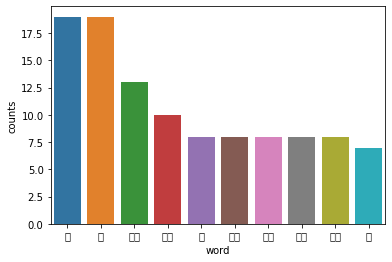

In [18]:
ws = [w for w in words if w.pos not in ["記号", "助詞"]]

cat_bigrams = [
    ws[i:i+2]
    for i in range(len(ws) - 2)
    if "猫" in [ws[i].surface, ws[i+1].surface]
]

cat_colls = [
    w1.surface if w2.surface == "猫" else w2.surface
    for w1, w2 in cat_bigrams
]

cat_popular = Counter(cat_colls).most_common()[0:10]
x = [t[0] for t in cat_popular]
y = [t[1] for t in cat_popular]
df = pd.DataFrame({
    "word": x,
    "counts": y,
})

sns.barplot(x="word", y="counts", data=df)
df

[None, None]

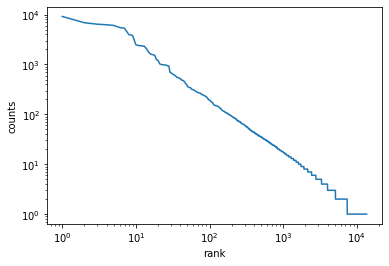

In [23]:
counter = Counter([w.surface for w in words if w.pos not in ["記号"]])

tups = [(rank+1, t[1]) for rank, t in enumerate(counter.most_common())]
x = [t[0] for t in tups]
y = [t[1] for t in tups]
df = pd.DataFrame({
    "rank": x,
    "counts": y,
})

sns.lineplot(x="rank", y="counts", data=df).set(xscale="log", yscale="log")